# ESPPRC pylgrim
This notebook is intended to test, how to use the pylgrim package.

In [3]:
import pylgrim
from pylgrim import ESPPRC
import networkx as nx
import numpy as np

import sys
sys.path.insert(0,'..')
import src.model as model

In [4]:
G = model.create_example_1().to_directed()
load = np.arange(G.number_of_nodes()-1)
G.graph['n_res'] = 1
for i in range(1,G.number_of_nodes()):
    G.add_edge("Start",i, weight=G.edges[0,i]['weight'])

for (u,v) in G.edges():
    if 0 < v <= dual.size:
        G[u][v]['load'] = [load[v-1]]
    else:
        G[u][v]['load'] = [0]
nx.draw(G)

NameError: name 'dual' is not defined

In [3]:
G[1][2]['load'][0]

KeyError: 'load'

In [95]:
G.nodes()
print(G.graph['capacity'])

20


In [96]:
G_preprocessed, res_min = ESPPRC.preprocess(G, "Start", 0, [G.graph['capacity']], res_name='load')

[{0: {0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}, 1: {1: 0, 0: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}, 2: {2: 0, 0: 0, 1: 0, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}, 3: {3: 0, 0: 0, 1: 0, 2: 1, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}, 4: {4: 0, 0: 0, 1: 0, 2: 1, 3: 2, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}, 5: {5: 0, 0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 6: 5, 7: 6, 8: 7, 9: 8}, 6: {6: 0, 0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 6, 8: 7, 9: 8}, 7: {7: 0, 0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 8: 7, 9: 8}, 8: {8: 0, 0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 9: 8}, 9: {9: 0, 0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}, 'Start': {'Start': 0, 1: 0, 0: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}}]


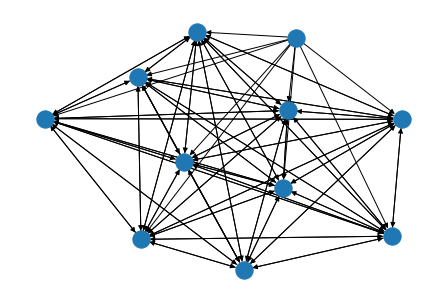

In [97]:
nx.draw(G_preprocessed)
print(res_min)

In [98]:
best_path, best_path_label = ESPPRC.GSSA(G_preprocessed, "Start",0,[G.graph['capacity']],res_min, res_name='load')

In [102]:
print('shortest path found: {} with label {}'.format(best_path, best_path_label))
print(list(best_path))
res = [u for u,_,_ in list(best_path)]
res[0] = 0
res.append(0)
print(res)

shortest path found: Start ⇨ 1 ⇨ 0 with label (6, array([0.]))
[('Start', 1, {'weight': 3, 'load': [0]}), (1, 0, {'weight': 3, 'load': [0]})]
[0, 1, 0]
